<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Libraries</a></span></li><li><span><a href="#Import-Data" data-toc-modified-id="Import-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import Data</a></span></li><li><span><a href="#Data-Wrangling" data-toc-modified-id="Data-Wrangling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Wrangling</a></span><ul class="toc-item"><li><span><a href="#Rename" data-toc-modified-id="Rename-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Rename</a></span></li><li><span><a href="#Data-Types" data-toc-modified-id="Data-Types-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Data Types</a></span></li><li><span><a href="#Identify-Missing-Values" data-toc-modified-id="Identify-Missing-Values-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Identify Missing Values</a></span></li></ul></li><li><span><a href="#Feature-Engineering:-Correlation" data-toc-modified-id="Feature-Engineering:-Correlation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Feature Engineering: Correlation</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Logistic Regression</a></span><ul class="toc-item"><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Data Preparation</a></span></li><li><span><a href="#Model-Fitting" data-toc-modified-id="Model-Fitting-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Model Fitting</a></span></li></ul></li></ul></div>

Hello! In this notebook, we'll perform binary classification of Indian liver patient records using Logistic Regression and K-NN Algorithm. The use case is available on [Kaggle](https://www.kaggle.com/uciml/indian-liver-patient-records) using the dataset from [UCI ML Repository](https://archive.ics.uci.edu/ml/datasets/ILPD+(Indian+Liver+Patient+Dataset)).

Patients with liver disease have been continuously increasing because of excessive consumption of alcohol, inhale of harmful gases, intake of contaminated food, pickles and drugs. This dataset was used to evaluate prediction algorithms in an effort to reduce burden on doctors. 

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats

In [2]:
sns.set(style="ticks", color_codes=True)
pd.options.mode.chained_assignment = None
pd.options.display.float_format = '{:.3f}'.format
pd.options.display.max_colwidth = None

# Import Data

In [3]:
liver = pd.read_csv("dataset/indian_liver_patient.csv")
liver.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.700,0.100,187,16,18,6.800,3.300,0.900,1
1,62,Male,10.900,5.500,699,64,100,7.500,3.200,0.740,1
2,62,Male,7.300,4.100,490,60,68,7.000,3.300,0.890,1
3,58,Male,1.000,0.400,182,14,20,6.800,3.400,1.000,1
4,72,Male,3.900,2.000,195,27,59,7.300,2.400,0.400,1


In [4]:
liver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India.

- Age: age of the patient. Any patient whose age exceeded 89 is listed as being of age 90.
- Gender: gender of the patient, either Male of Female
- Total_Bilirubin: Amount of bilirubin in mg/dL
- Direct_Bilirubin: 
- Alkaline_Phosphotase:
- Alamine_Aminotransferase:
- Aspartate_Aminotransferase:
- Total_Protiens:
- Albumin:
- Albumin_and_Globulin_Ratio:
- Dataset: a class label used to divide groups into liver patient (1 = liver disease) or not (2 = no disease)

# Data Wrangling

## Rename

In [5]:
# Rename Columns
column_names = {
    "Age": "Age",
    "Gender": "Gender",
    "TB": "Total Bilirubin",
    "DB": "Direct Bilirubin",
    "ALP": "Alkaline Phosphotase",
    "ALT": "Alamine Aminotransferase",
    "AST": "Aspartate Aminotransferase",
    "TP": "Total Proteins",
    "Albumin": "Albumin",
    "A/G Ratio": "Albumin and Globulin Ratio",
    "Disease": "Dataset"
}
liver.columns = column_names.keys()

# Rename target variable values
liver.loc[liver["Disease"] == 1, "Disease"] = "Yes"
liver.loc[liver["Disease"] == 2, "Disease"] = "No"
liver.head()

,Age,Gender,TB,DB,ALP,ALT,AST,TP,Albumin,A/G Ratio,Disease
0,65,Female,0.700,0.100,187,16,18,6.800,3.300,0.900,Yes
1,62,Male,10.900,5.500,699,64,100,7.500,3.200,0.740,Yes
2,62,Male,7.300,4.100,490,60,68,7.000,3.300,0.890,Yes
3,58,Male,1.000,0.400,182,14,20,6.800,3.400,1.000,Yes
4,72,Male,3.900,2.000,195,27,59,7.300,2.400,0.400,Yes


## Data Types

In [6]:
liver[["Gender", "Disease"]] = liver[["Gender", "Disease"]].astype("category")
liver.dtypes

Age             int64
Gender       category
TB            float64
DB            float64
ALP             int64
ALT             int64
AST             int64
TP            float64
Albumin       float64
A/G Ratio     float64
Disease      category
dtype: object

In [7]:
for col in liver.select_dtypes('category').columns:
    print(col, ":", liver[col].cat.categories)

Gender : Index(['Female', 'Male'], dtype='object')
Disease : Index(['No', 'Yes'], dtype='object')


## Identify Missing Values

In [8]:
liver.isna().sum()

Age          0
Gender       0
TB           0
DB           0
ALP          0
ALT          0
AST          0
TP           0
Albumin      0
A/G Ratio    4
Disease      0
dtype: int64

Four observations in A/G Ratio is missing, will be handle later on after feature engineering

# Feature Engineering: Correlation

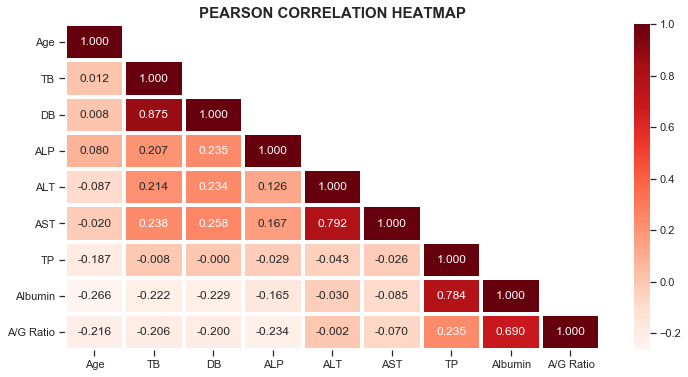

In [9]:
def plotCorrelationHeatmap(data, figsize = (12,6)):
    plt.figure(figsize=figsize)
    corr_val = data.corr(method = "pearson")
    mask = np.zeros_like(corr_val, dtype = np.bool)
    mask[np.triu_indices_from(mask, k = 1)] = True
    corr_heatmap = sns.heatmap(corr_val, mask = mask,
                               annot = True, fmt='.3f', linewidths = 3, cmap = "Reds")
    corr_heatmap.set_title("PEARSON CORRELATION HEATMAP", fontsize = 15, fontweight = "bold")
    corr_heatmap

plotCorrelationHeatmap(liver)

Consider $|corr| > 0.6$ as strong, we want to remove multicolinearity in our data by convert these features:
- `TB` and `DB` (0.875): Merge into `DB/TB Percentage` https://synapse.koreamed.org/DOIx.php?id=10.3343/lmo.2018.8.4.127
- `AST` and `ALT` (0.792): Merge into `AST/ALT Ratio` https://en.wikipedia.org/wiki/AST/ALT_ratio
- `Albumin` and `A/G Ratio` (0.69): Calculate `Globulin` level, given the ratio
- `Albumin` and `TP` (0.784): Albumin is some sort of protein, it certainly have strong correlation with `TP` (Total Protein). These two variables will be discussed later.

In [10]:
liver["DB/TB Percentage"] = liver["DB"]/liver["TB"]*100
liver["AST/ALT Ratio"] = liver["AST"]/liver["ALT"]
liver["Globulin"] = liver["Albumin"]/liver["A/G Ratio"]

In [11]:
liver = liver.drop(["DB", "TB", "AST", "ALT", "A/G Ratio"], axis = 1)
liver.head()

,Age,Gender,ALP,TP,Albumin,Disease,DB/TB Percentage,AST/ALT Ratio,Globulin
0,65,Female,187,6.800,3.300,Yes,14.286,1.125,3.667
1,62,Male,699,7.500,3.200,Yes,50.459,1.562,4.324
2,62,Male,490,7.000,3.300,Yes,56.164,1.133,3.708
3,58,Male,182,6.800,3.400,Yes,40.000,1.429,3.400
4,72,Male,195,7.300,2.400,Yes,51.282,2.185,6.000


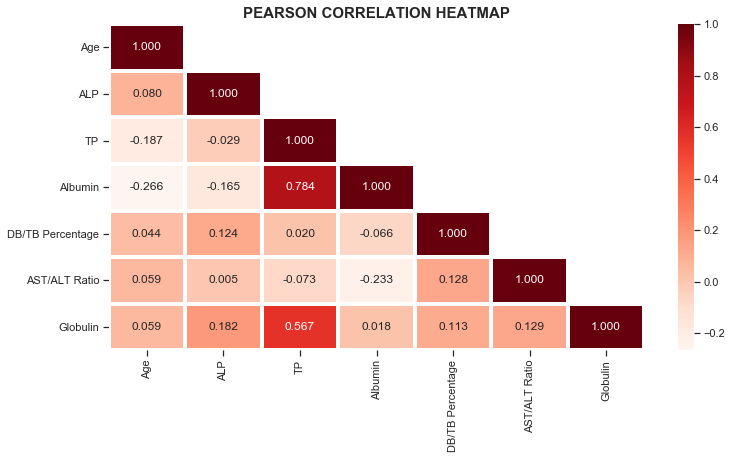

In [12]:
plotCorrelationHeatmap(liver)

Interestingly, `TP` is now positive correlated strongly with both `Albumin` and `Globulin`. Let's manually add the value of `Albumin` and `Globulin` as `Albumin+Globulin` then compare it with `TP`:

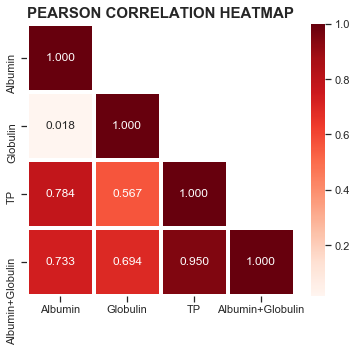

In [13]:
AG_df = liver[["Albumin", "Globulin", "TP"]]
AG_df["Albumin+Globulin"] = AG_df["Albumin"] + AG_df["Globulin"]
plotCorrelationHeatmap(AG_df, (6,5))

Such a strong (almost perfect) correlation between `TP` and `Albumin+Globulin`, indicating that `TP` can be explained by `Albumin` and `Globulin` itself. So we will do the following step:
1. Handle missing value, remember the missing value in `A/G Ratio`? Now the missing value is moving to `Globulin` since we calculate it using `A/G Ratio`. We will impute `Globulin` value by fitting linear regression using formula $TP = Albumin + Globulin + const$.
2. Drop `TP` column

There are four rows with missing value of `Globulin`

In [14]:
missing = liver["Globulin"].isna()
liver[missing]

,Age,Gender,ALP,TP,Albumin,Disease,DB/TB Percentage,AST/ALT Ratio,Globulin
209,45,Female,189,6.600,3.900,Yes,33.333,1.435,nan
241,51,Male,230,6.500,3.100,Yes,25.000,1.917,nan
253,35,Female,180,5.200,2.700,No,33.333,1.250,nan
312,27,Male,106,8.500,4.800,No,46.154,2.160,nan


Fitting linear regression using non-missing data

In [15]:
import statsmodels.api as sm
X = liver[-missing][["Albumin", "Globulin"]]
y = liver[-missing]["TP"].values
lin_reg = sm.OLS(y, sm.add_constant(X)).fit()
print("Adjusted R-squared: {:.3f}%".format(100*lin_reg.rsquared_adj))
beta = lin_reg.params.values 
print(beta)

Adjusted R-squared: 91.812%
[0.39837983 1.05545614 0.79825032]


Change the formula, use it to impute `Globulin`

$TP = \beta_0 + \beta_1*Albumin + \beta_2*Globulin$ <br>
$Globulin = \dfrac{TP - \beta_0 - \beta_1*Albumin}{\beta_2}$

In [16]:
liver["Globulin"] = liver.apply(
    lambda row: (row.TP - beta[0] - beta[1]*row.Albumin)/beta[2] if np.isnan(row.Globulin) else row.Globulin, axis=1
)

In [17]:
liver[missing]

,Age,Gender,ALP,TP,Albumin,Disease,DB/TB Percentage,AST/ALT Ratio,Globulin
209,45,Female,189,6.600,3.900,Yes,33.333,1.435,2.612
241,51,Male,230,6.500,3.100,Yes,25.000,1.917,3.545
253,35,Female,180,5.200,2.700,No,33.333,1.250,2.445
312,27,Male,106,8.500,4.800,No,46.154,2.160,3.803


In [18]:
liver.isna().sum()

Age                 0
Gender              0
ALP                 0
TP                  0
Albumin             0
Disease             0
DB/TB Percentage    0
AST/ALT Ratio       0
Globulin            0
dtype: int64

In [19]:
liver = liver.drop(["TP"], axis = 1)
liver.head()

,Age,Gender,ALP,Albumin,Disease,DB/TB Percentage,AST/ALT Ratio,Globulin
0,65,Female,187,3.300,Yes,14.286,1.125,3.667
1,62,Male,699,3.200,Yes,50.459,1.562,4.324
2,62,Male,490,3.300,Yes,56.164,1.133,3.708
3,58,Male,182,3.400,Yes,40.000,1.429,3.400
4,72,Male,195,2.400,Yes,51.282,2.185,6.000


# EDA

Pair plot: Little to no correlation between the independent variables

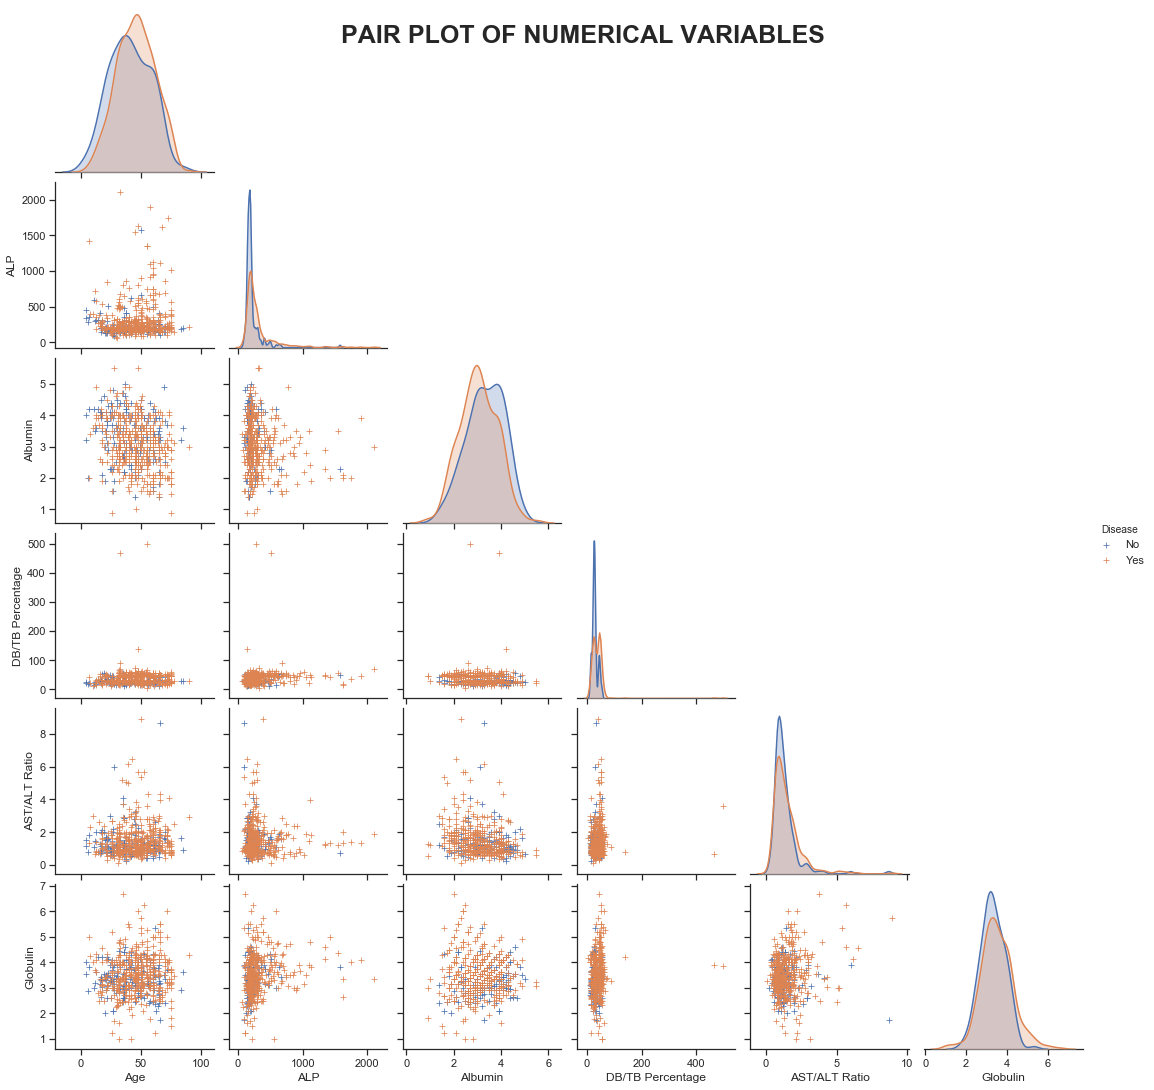

In [20]:
pair_plot = sns.pairplot(liver, hue = "Disease", diag_kind = "kde", corner = True, markers = '+',)
pair_plot.fig.suptitle("PAIR PLOT OF NUMERICAL VARIABLES", size = 25, fontweight = "bold")
pair_plot

Box plot:
- Patient who have liver disease, in median, have ... compared to those who doesn't.
- Variable need to be scaled: ALP

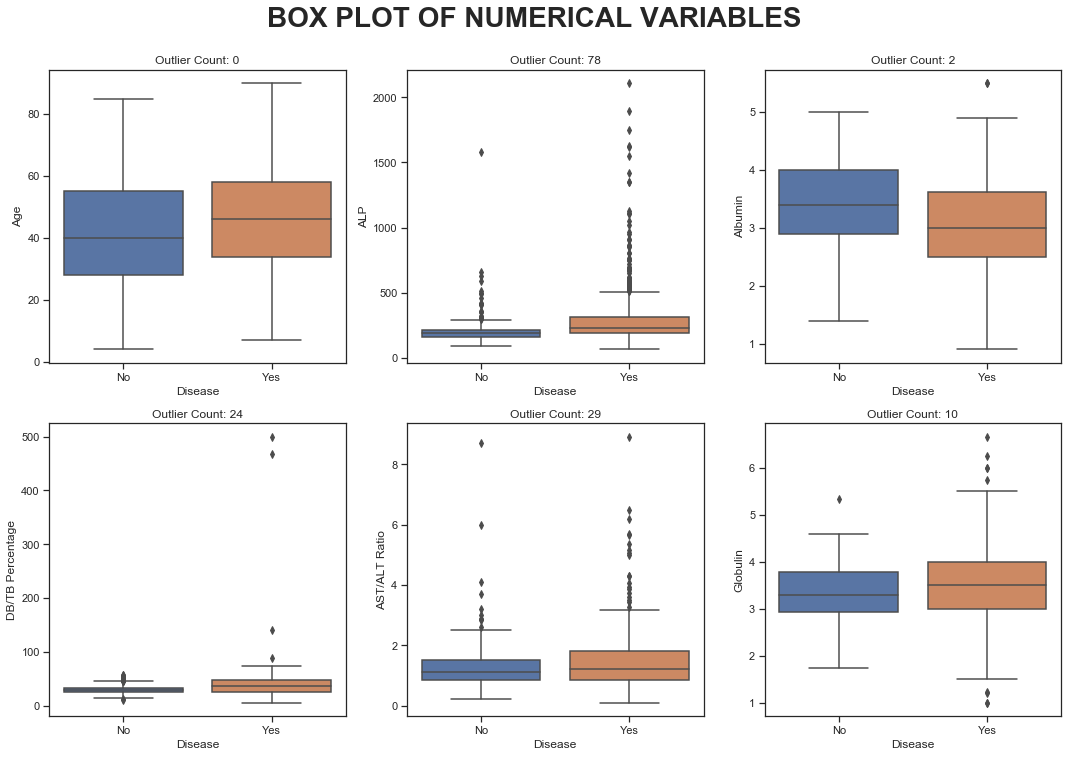

In [21]:
fig, axes = plt.subplots(2, 3, figsize=(15,10))

for ax, col in zip(axes.flat, liver.select_dtypes('number').columns):
    sns.boxplot(x = "Disease", y = col, data = liver, ax = ax)
    # Outlier Count
    outlier_count = 0
    for disease in liver["Disease"].cat.categories:
        liver_disease = liver.loc[liver["Disease"] == disease, col]
        outlier_list = boxplot_stats(liver_disease).pop(0)['fliers']
        outlier_count += len(outlier_list)
    ax.set_title("Outlier Count: {}".format(outlier_count))
    
plt.tight_layout()
fig.suptitle("BOX PLOT OF NUMERICAL VARIABLES", size = 28, y = 1.05, fontweight = "bold")
plt.show()

In [22]:
transform_col = ["ALP", "AST/ALT Ratio"]
liver[transform_col] = liver[transform_col].transform(np.log)

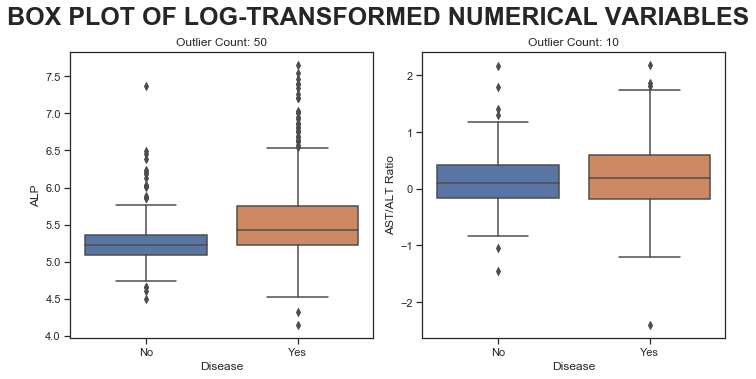

In [23]:
fig, axes = plt.subplots(1, len(transform_col), figsize=(10,5))

for ax, col in zip(axes, transform_col):
    sns.boxplot(x = "Disease", y = col, data = liver, ax = ax)
    # Outlier Count
    outlier_count = 0
    for disease in liver["Disease"].cat.categories:
        liver_disease = liver.loc[liver["Disease"] == disease, col]
        outlier_list = boxplot_stats(liver_disease).pop(0)['fliers']
        outlier_count += len(outlier_list)
    ax.set_title("Outlier Count: {}".format(outlier_count))
    
plt.tight_layout()
fig.suptitle("BOX PLOT OF LOG-TRANSFORMED NUMERICAL VARIABLES", size = 25, y = 1.05, fontweight = "bold")
plt.show()

Check frequency of each levels

In [24]:
pd.crosstab(index = liver.Disease,
            columns = liver.Gender,
            margins = True)

Gender,Female,Male,All
Disease,,,
No,50,117,167
Yes,92,324,416
All,142,441,583


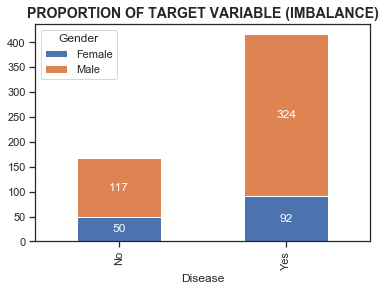

In [25]:
def plotDiseaseCount(data):
    ax = data.groupby(['Disease', 'Gender']).size().unstack().plot(kind='bar', stacked=True)
    for rect in ax.patches:
        height = rect.get_height()
        width = rect.get_width()
        padding = 0.25

        ax.text(rect.get_x() + width - padding, 
                rect.get_y() + height / 2, 
                int(height), 
                ha = 'center', va = 'center',
                color = "white")

plotDiseaseCount(liver)
plt.title("PROPORTION OF TARGET VARIABLE (IMBALANCE)", fontsize = 14, fontweight = "bold")
plt.show()

Imbalance data! Let's handle it

In [26]:
from sklearn.utils import resample
liver_majority = liver[liver["Disease"] == "Yes"]
liver_minority = liver[liver["Disease"] == "No"]
liver_minority_upsampled = resample(liver_minority,
                                    n_samples = liver_majority.shape[0],
                                    replace = True,
                                    random_state = 321)
liver_upsampled = pd.concat([liver_majority, liver_minority_upsampled])
liver_upsampled

,Age,Gender,ALP,Albumin,Disease,DB/TB Percentage,AST/ALT Ratio,Globulin
0,65,Female,5.231,3.300,Yes,14.286,0.118,3.667
1,62,Male,6.550,3.200,Yes,50.459,0.446,4.324
2,62,Male,6.194,3.300,Yes,56.164,0.125,3.708
3,58,Male,5.204,3.400,Yes,40.000,0.357,3.400
4,72,Male,5.273,2.400,Yes,51.282,0.782,6.000
...,...,...,...,...,...,...,...,...
150,56,Male,5.193,3.800,No,45.455,0.336,3.167
551,29,Male,5.075,3.000,No,33.333,0.095,3.333
140,60,Male,5.226,3.300,No,16.667,0.049,3.000
265,4,Male,5.852,4.000,No,22.222,0.125,4.000


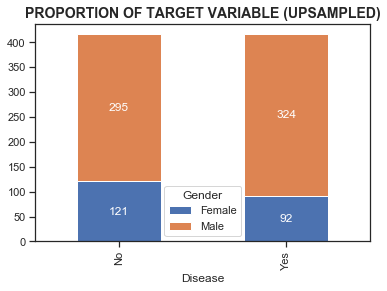

In [27]:
plotDiseaseCount(liver_upsampled)
plt.title("PROPORTION OF TARGET VARIABLE (UPSAMPLED)", fontsize = 14, fontweight = "bold")
plt.show()

Balanced!

# Logistic Regression

## Data Preparation
We have to do some data preparation specifically for modeling:
- Separate the target variable from the predictors
- Create dummy variables for the categorical predictors
- Train test split in order to evaluate our model, with 80% train and 20% test

In [28]:
liver_dummy = pd.get_dummies(liver_upsampled, columns = liver_upsampled.select_dtypes('category').columns, drop_first = True)
X = liver_dummy.drop(["Disease_Yes"], axis = 1)
y = liver_dummy.Disease_Yes.values
X.head()

,Age,ALP,Albumin,DB/TB Percentage,AST/ALT Ratio,Globulin,Gender_Male
0,65,5.231,3.300,14.286,0.118,3.667,0
1,62,6.550,3.200,50.459,0.446,4.324,1
2,62,6.194,3.300,56.164,0.125,3.708,1
3,58,5.204,3.400,40.000,0.357,3.400,1
4,72,5.273,2.400,51.282,0.782,6.000,1


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 321)
print("X Train:", X_train.shape)
print("X Test:", X_test.shape)
print("y Train:", y_train.shape)
print("y Test:", y_test.shape)

X Train: (624, 7)
X Test: (208, 7)
y Train: (624,)
y Test: (208,)


## Model Fitting

In [30]:
import statsmodels.api as sm
model_all = sm.Logit(y_train, sm.add_constant(X_train))
result_all = model_all.fit()
print(result_all.summary())

Optimization terminated successfully.
         Current function value: 69.595686
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  624
Model:                          Logit   Df Residuals:                      616
Method:                           MLE   Df Model:                            7
Date:                Tue, 31 Mar 2020   Pseudo R-squ.:                     inf
Time:                        04:49:30   Log-Likelihood:                -43428.
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -7.6747      1.350     -5.685      0.000     -10.321      -5.029
Age       

C:\Users\USER\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\USER\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\USER\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:3409: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


In [31]:
remove_col_list = ["AST/ALT Ratio", "Gender_Male"]
X_train_wo_age_gender = X_train.drop(remove_col_list, axis = 1)
model_wo_age_gender = sm.Logit(y_train, sm.add_constant(X_train_wo_age_gender))
result_wo_age_gender = model_wo_age_gender.fit()
print(result_wo_age_gender.summary())

Optimization terminated successfully.
         Current function value: 69.580957
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  624
Model:                          Logit   Df Residuals:                      618
Method:                           MLE   Df Model:                            5
Date:                Tue, 31 Mar 2020   Pseudo R-squ.:                     inf
Time:                        04:49:30   Log-Likelihood:                -43419.
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -7.5797      1.346     -5.632      0.000     -10.217      -4.942
Age       

C:\Users\USER\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\USER\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\USER\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:3409: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


In [32]:
import sklearn.metrics as metrics

def evaluateLogReg(result, X_true, y_true, threshold = 0.5):
    y_pred_prob = result.predict(sm.add_constant(X_true))
    y_pred_cl = (y_pred_prob > threshold).astype(int)
    eval_res = {
        "Confusion Matrix": metrics.confusion_matrix(y_true, y_pred_cl),
        "Accuracy": metrics.accuracy_score(y_true, y_pred_cl),
        "Precision": metrics.precision_score(y_true, y_pred_cl),
        "Recall": metrics.recall_score(y_true, y_pred_cl),
        "F1": metrics.f1_score(y_true, y_pred_cl)
    }
    return eval_res

In [33]:
def evalMetricsCurve(result, X_true, y_true):
    eval_list = []
    for threshold in np.linspace(0, 0.99, 50):
        eval_res = evaluateLogReg(result, X_true, y_true, threshold)
        eval_res["Threshold"] = threshold
        eval_list.append(eval_res)
    eval_df = pd.DataFrame(eval_list)
    return eval_df

def plotMetricsCurve(eval_df, title): 
    opt_thresh = eval_df[eval_df["F1"] == max(eval_df["F1"])]["Threshold"].values[0]
    eval_df.plot(x = "Threshold", color = "rbgk")
    plt.axvline(x = opt_thresh, ls = '--', color = "k")
    plt.text(x = opt_thresh + 0.01, y = 0.1, 
             text = "{:.3f}\n(OPT)".format(opt_thresh), 
             s = 10, color = "k")
    
    eval_df["Variance"] = eval_all.iloc[:,1:5].var(axis = 1)
    eq_thresh = eval_df[eval_df["Variance"] == min(eval_df["Variance"])]["Threshold"].values[0]
    plt.axvline(x = eq_thresh, ls = '--', color = "g")
    plt.text(x = eq_thresh + 0.01, y = 0.1, 
             text = "{:.3f}\n(CENTER)".format(eq_thresh), 
             s = 10, color = "g")
    
    plt.ylabel("Performance")
    plt.title(title.upper(), fontsize = 12, fontweight = "bold", y = 1.05)
    plt.legend(loc = "upper center", bbox_to_anchor = (0.5, -0.15),
              fancybox = True, shadow = True, ncol = 4)
    
    plt.show()
    
    return opt_thresh

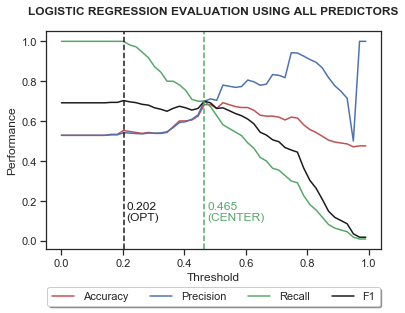

In [34]:
eval_all = evalMetricsCurve(result_all, X_test, y_test)
thresh_all = plotMetricsCurve(eval_all, "LOGISTIC REGRESSION EVALUATION USING ALL PREDICTORS")

In [35]:
eval_all[eval_all["Threshold"] == thresh_all]

,Confusion Matrix,Accuracy,Precision,Recall,F1,Threshold,Variance
10,"[[5, 93], [0, 110]]",0.553,0.542,1.000,0.703,0.202,0.046


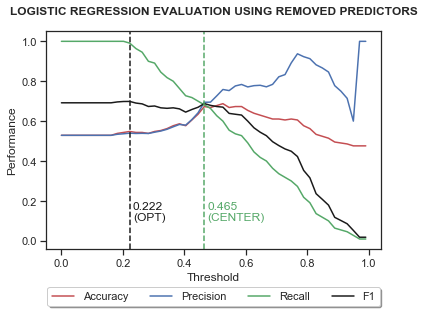

In [36]:
X_test_wo_age_gender = X_test.drop(remove_col_list, axis = 1)
eval_wo = evalMetricsCurve(result_wo_age_gender, X_test_wo_age_gender, y_test)
thresh_wo = plotMetricsCurve(eval_wo, "LOGISTIC REGRESSION EVALUATION USING REMOVED PREDICTORS")

In [37]:
eval_wo[eval_wo["Threshold"] == thresh_wo]

,Confusion Matrix,Accuracy,Precision,Recall,F1,Threshold,Variance
11,"[[5, 93], [1, 109]]",0.548,0.540,0.991,0.699,0.222,0.043
